# Stac installation, and a short guide

Stac is a python package. It has a number of dependencies, the most important of which are

* qiskit
* stim
* a working latex installation [if you want pretty latex figures]

To install stac, please run the following cell

In [ ]:
!pip install git+https://github.com/abdullahkhalids/stac

If you don't have git installed, you can also just download the repository directly, and run `!pip install /path/to/repo/dir`.

# Testing the installation

The following commands show you how to create a quantum code. You will understand what they mean as you read the book. Right now, just make sure the commands work.

In [1]:
import stac
cd = stac.CommonCodes.generate_code("[[7,1,3]]")
cd.generator_matrix

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]])

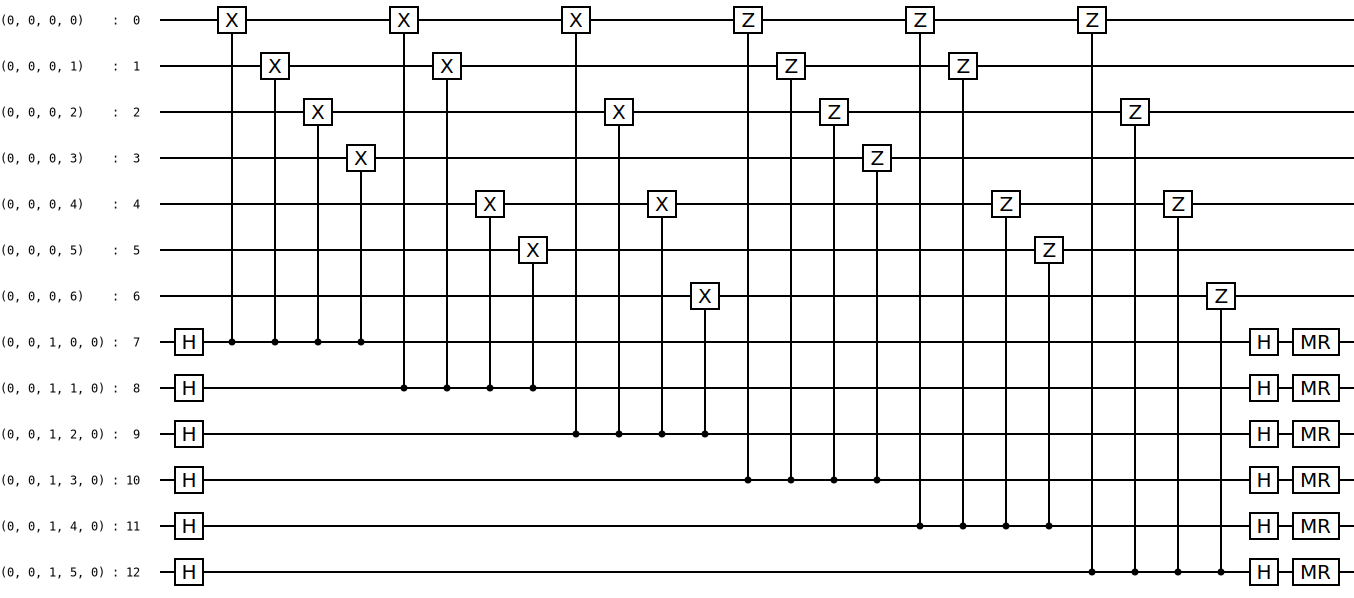

In [2]:
circ = cd.construct_syndrome_circuit()
circ.draw()

In [3]:
# stac uses qiskit to simulate circuits
# if this fails, qiskit is not properly installed
circ.simulate()

        basis    amplitude
-------------  -----------
0000000110000        0.354
1111000110000       -0.354
1100110110000       -0.354
0011110110000        0.354
1010101110000        0.354
0101101110000       -0.354
0110011110000       -0.354
1001011110000        0.354


In [4]:
# it uses stim to sample from circuits
# if this fails, stim is not properly installed
circ.sample()

[1 1 1 0 0 0]


If the above commands work, then stac, and its dependencies, are properly installed on your machine.

## A guide to stac quantum circuits
Stac allows you to create quantum circuits. Here is a short guide on the syntax stac uses.

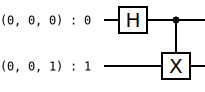

In [5]:
import stac
# create circuit object.
# specify the number of qubits in the circuit
circ = stac.Circuit.simple(2)
# operations are added with the append method
circ.append('H', 0)
circ.append('CX', 0, 1)

# you can draw the circuit using the draw method
circ.draw()

In [6]:
# you can simulate a circuit using qiskit's statevector simulator like so
# this will present the output state in a nice readable form
circ.simulate()

  basis    amplitude
-------  -----------
     00        0.707
     11        0.707


In [7]:
# or you can use stim https://github.com/quantumlib/Stim/
# to sample from the circuit

# first add measurements to the circuit
circ.append('M', 0)
circ.append('M', 1)
# then sample 10 times
circ.sample(10)

[0 0]
[0 0]
[0 0]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[0 0]
[0 0]


## Further documentation on stac
The latest documentation on stac will be available from the [github repository](https://github.com/abdullahkhalids/stac).

Currently, the main reference documentations are

* [Api reference](https://github.com/abdullahkhalids/stac/blob/main/api_reference.md)
* [Operations reference](https://github.com/abdullahkhalids/stac/blob/main/operations_reference.md)